## Convolution
Convolution is an elementwise multiplication by a matrix or filter
in order to generate a feature map that extract features. [[6 2.3](biblio.txt)]

- https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/
- https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

In [1]:
import numpy as np
from keras.layers import Conv2D
from keras.backend import constant, reshape, expand_dims, squeeze

#constant - Creates a constant tensor.

#reshape - Reshapes a tensor to the specified shape.

#expand_dims - Adds a 1-sized dimension at index "axis".

In [2]:
values = np.array([
    [  12,   20,   30,    0],
    [   8,   12,    2,    0],
    [  34,   70,   37,    4],
    [ 112,  100,   25,   12]
])

In [3]:
value_as_tensor = constant(values)
value_as_tensor

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 12.,  20.,  30.,   0.],
       [  8.,  12.,   2.,   0.],
       [ 34.,  70.,  37.,   4.],
       [112., 100.,  25.,  12.]], dtype=float32)>

In [4]:
reshaped_tensor_value = reshape(value_as_tensor, shape=(1,4,4,1))
reshaped_tensor_value

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 12.],
         [ 20.],
         [ 30.],
         [  0.]],

        [[  8.],
         [ 12.],
         [  2.],
         [  0.]],

        [[ 34.],
         [ 70.],
         [ 37.],
         [  4.]],

        [[112.],
         [100.],
         [ 25.],
         [ 12.]]]], dtype=float32)>

In [5]:
# The default kernel initializer for Conv2D is glorot_uniform. For this example, we will define
# it with a specific seed value for demonstration purposes
from keras import initializers
glorot_uniform = initializers.GlorotUniform(seed=1)

conv2d = Conv2D(filters=32, kernel_size=(1,1), activation='relu', kernel_initializer=glorot_uniform)
conv2d(reshaped_tensor_value)

# Other initializers include zeros, ones, random. Why would we not want to use zeros or ones?
# What benefits do we get from random initializers?
# http://proceedings.mlr.press/v9/glorot10a.html

<tf.Tensor: shape=(1, 4, 4, 32), dtype=float32, numpy=
array([[[[3.87330937e+00, 0.00000000e+00, 1.02634406e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 2.82931709e+00, 0.00000000e+00,
          3.24800420e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 4.30188131e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 1.35631943e+00, 0.00000000e+00,
          0.00000000e+00, 1.76827025e+00, 1.17433190e-01,
          0.00000000e+00, 1.18346930e-01, 1.16541123e+00,
          0.00000000e+00, 2.21767187e+00],
         [6.45551586e+00, 0.00000000e+00, 1.71057343e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 4.71552849e+00, 0.00000000e+00,
          5.41334057e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 7.16980219e+00,
          0.00000000e+00, 0.0000

In [6]:
# Load Keras' functions to work with a one-off image
from keras.preprocessing.image import load_img, img_to_array, array_to_img

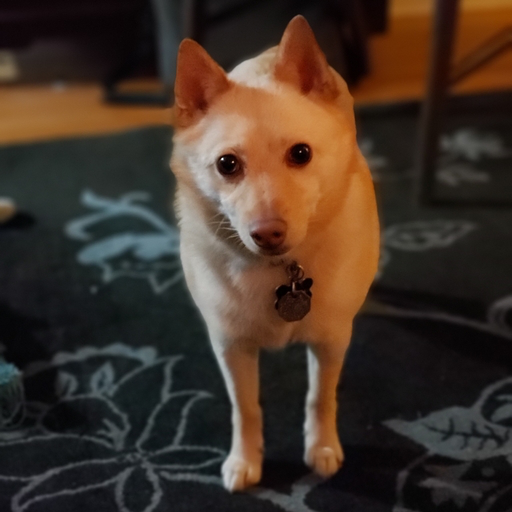

In [7]:
img = load_img('./figures/ace.jpg')
img

In [8]:
img_array = img_to_array(img)
tensor = expand_dims(img_array, axis=0)
tensor

<tf.Tensor: shape=(1, 512, 512, 3), dtype=float32, numpy=
array([[[[ 14.,   5.,   8.],
         [ 15.,   6.,   9.],
         [ 16.,   7.,  10.],
         ...,
         [167., 107.,  34.],
         [167., 107.,  34.],
         [166., 108.,  34.]],

        [[ 13.,   4.,   7.],
         [ 13.,   4.,   7.],
         [ 15.,   6.,   9.],
         ...,
         [166., 106.,  33.],
         [165., 105.,  32.],
         [165., 105.,  32.]],

        [[ 15.,   6.,   9.],
         [ 14.,   5.,   8.],
         [ 15.,   6.,   9.],
         ...,
         [165., 103.,  30.],
         [165., 103.,  30.],
         [167., 103.,  31.]],

        ...,

        [[ 15.,  14.,  20.],
         [ 15.,  14.,  20.],
         [ 16.,  15.,  21.],
         ...,
         [ 20.,  18.,  19.],
         [ 21.,  19.,  20.],
         [ 24.,  20.,  21.]],

        [[ 14.,  13.,  19.],
         [ 14.,  13.,  19.],
         [ 15.,  14.,  20.],
         ...,
         [ 21.,  19.,  20.],
         [ 23.,  21.,  22.],
         

In [9]:
conv2d = Conv2D(filters=32, kernel_size=(7,7), activation='relu', kernel_initializer=glorot_uniform)
conv_tensor = conv2d(tensor)
conv_tensor

<tf.Tensor: shape=(1, 506, 506, 32), dtype=float32, numpy=
array([[[[ 2.4558618 ,  0.        ,  1.2821909 , ...,  0.        ,
           0.        ,  0.        ],
         [ 2.9313684 ,  0.        ,  1.5450281 , ...,  0.        ,
           0.        ,  0.        ],
         [ 2.543992  ,  0.        ,  2.1583478 , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [16.240854  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [16.551945  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [15.881353  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 1.9665842 ,  0.        ,  1.4269073 , ...,  0.        ,
           0.        ,  0.        ],
         [ 2.2281563 ,  0.        ,  1.5112816 , ...,  0.        ,
           0.        ,  0.        ],
         [ 2.3247843 ,  0.        ,  1.185006  , ...,  0.        ,
           0.        ,  0.

In [10]:
from tensorflow import unstack

# take our 4D tensor to a 3D by dropping the batch axis: (1, x, y, 32) -> (x, y, 32)
squezzed_tensor = squeeze(conv_tensor, axis=0)  # The axis must have a size of 1 to be removed

# take 3D tensor of filters to list of 2D filters: (x, y, 32) -> [(x, y), n...]
filters = [filtered for filtered in unstack(squezzed_tensor, axis=2)]

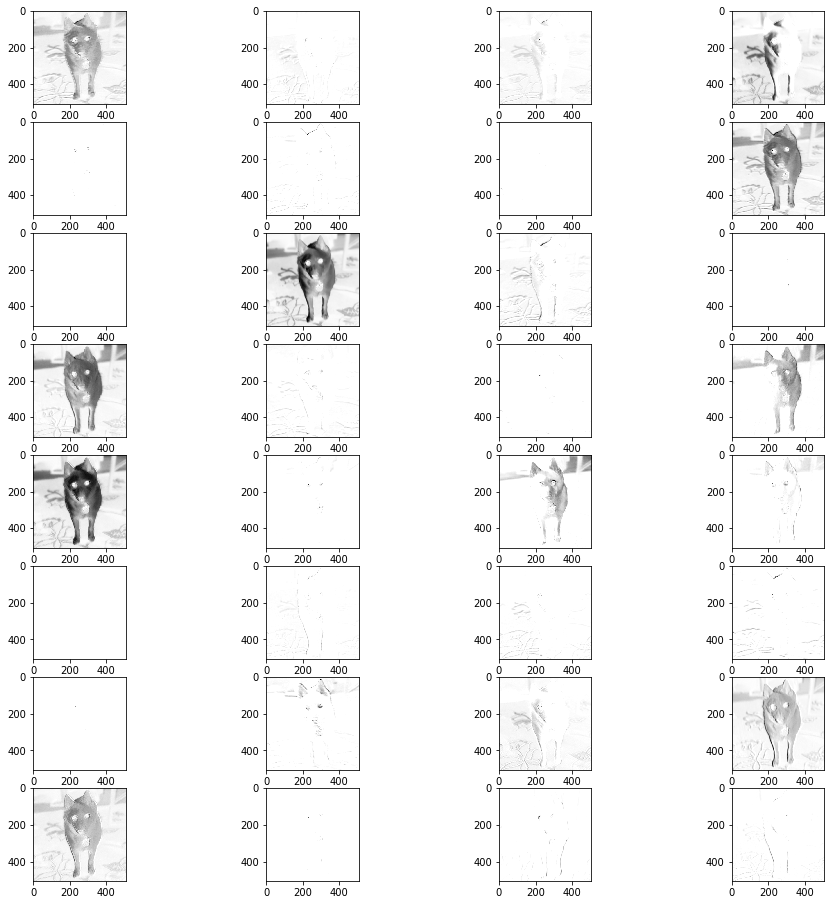

In [11]:
# Visualize our filters

import matplotlib.pyplot as plt
columns = 4
rows = 8
fig=plt.figure(figsize=(16, 16))
for i, img in enumerate(filters):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='Greys')
plt.show()
    

In [ ]:
# For additional information on Conv2D

help(Conv2D)